# 📘 Clase 10: Funciones universales (ufunc) y vectorización avanzada
## 🎯 Objetivos

- Entender qué son las ufuncs y cómo aceleran el cálculo.

- Crear tus propias funciones vectorizadas con np.vectorize.

- Usar funciones matemáticas integradas (sin, exp, sqrt, etc.).

## 💻 Ejemplo


In [6]:
import numpy as np

arr = np.linspace(0, np.pi, 5)
print("Seno:", np.sin(arr))
print("Exponencial:", np.exp(arr))

# Función personalizada vectorizada
def triple(x):
    return 3 * x

vfunc = np.vectorize(triple)
print("Vectorizada:", vfunc(np.array([1, 2, 3, 4])))


Seno: [0.00000000e+00 7.07106781e-01 1.00000000e+00 7.07106781e-01
 1.22464680e-16]
Exponencial: [ 1.          2.19328005  4.81047738 10.55072407 23.14069263]
Vectorizada: [ 3  6  9 12]


## 🧩 Ejercicios

1. Aplica np.log, np.sqrt, y np.exp sobre un mismo arreglo.

2.  Crea una función personalizada que devuelva "Par" o "Impar" y vectorízala.

3. Explica por qué las ufuncs son más rápidas que los bucles tradicionales.

In [ ]:
# respuesta
import numpy as np

# 1. Aplica np.log, np.sqrt, y np.exp sobre un mismo arreglo.

arreglo = np. arange(1,9) # creacion de arreglo
print(f'Arreglo de datos {arreglo}') 

print(f'\nCalculo del logaritmo natural del arreglo\n{np.log(arreglo)}')
print(f'\nCalculo la raiz cuadrada del arreglo\n{np.sqrt(arreglo)}')
print(f'\nCalculo el Exp del arreglo\n{np.exp(arreglo)}')

Arreglo de datos [1 2 3 4 5 6 7 8]

Calculo del logaritmo natural del arreglo
[0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154]

Calculo la raiz cuadrada del arreglo
[1.         1.41421356 1.73205081 2.         2.23606798 2.44948974
 2.64575131 2.82842712]

Calculo el Exp del arreglo
[2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03]


In [19]:
# Respuesta 
import numpy as np

# 2.  Crea una función personalizada que devuelva "Par" o "Impar" y vectorízala.

# creando funcion 

def par_impar(x):
    if x%2 == 0:
        return 'Par'
    else:
        return 'Impar'

par_impar_vectorizada =np.vectorize(par_impar)

print(f'Funcion vectorizada {par_impar_vectorizada(np.array([2,3]))}')

Funcion vectorizada ['Par' 'Impar']


In [20]:
# Respuesta 
#3. Explica por qué las ufuncs son más rápidas que los bucles tradicionales.

print('--- ¿POR QUÉ LAS UFUNCS SON RÁPIDAS? ---')
print('Las ufuncs son mucho más rápidas que los bucles de Python por la VECTORIZACIÓN.')
print('1. Código Compilado: Las ufuncs son implementaciones optimizadas en C y Fortran, no en Python, lo que permite su ejecución a velocidad nativa.')
print('2. Operación Simultánea: Aplican la operación a ARREGLOS COMPLETOS de una sola vez (Vectorización), eliminando la sobrecarga (overhead) del intérprete de Python en cada elemento.')

--- ¿POR QUÉ LAS UFUNCS SON RÁPIDAS? ---
Las ufuncs son mucho más rápidas que los bucles de Python por la VECTORIZACIÓN.
1. Código Compilado: Las ufuncs son implementaciones optimizadas en C y Fortran, no en Python, lo que permite su ejecución a velocidad nativa.
2. Operación Simultánea: Aplican la operación a ARREGLOS COMPLETOS de una sola vez (Vectorización), eliminando la sobrecarga (overhead) del intérprete de Python en cada elemento.


## 💼 Casos reales (Intermedio + Avanzado)

1. Simulación financiera:
Simula los precios diarios de una acción durante 252 días (1 año laboral).

- Precio inicial: 100

- Variación diaria: distribución normal con media 0.001 y desviación 0.02

- Calcula el precio final y grafica la evolución.

2. Procesamiento de imagen básica:
Simula una imagen 256x256 con valores de brillo (0–255).

- Normaliza los valores entre 0 y 1.

- Aplica una transformación logarítmica y analiza el resultado.

--- RESULTADOS DE LA SIMULACIÓN ---
Precio Inicial: $100.00
Precio Final (Día 252): $218.02


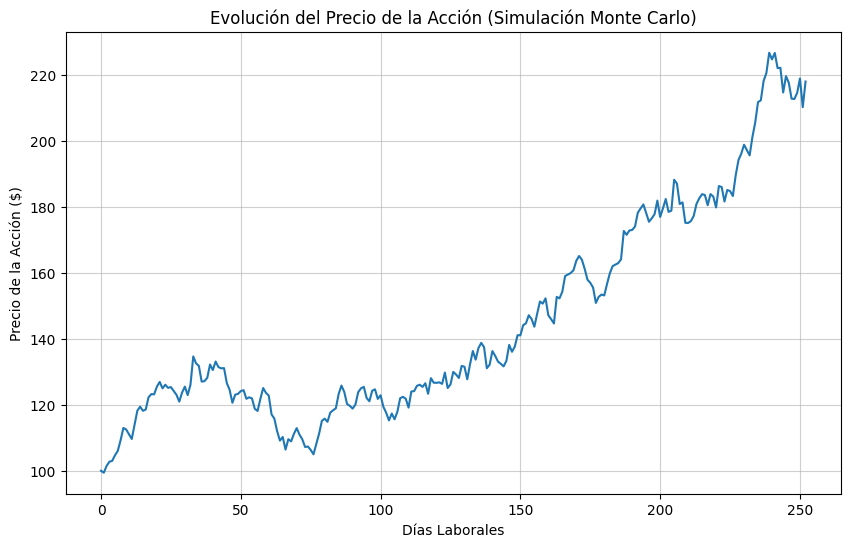

In [5]:
import numpy as np
# Importamos matplotlib para la visualización, un paso necesario para graficar
import matplotlib.pyplot as plt

np.random.seed(32)

# Parámetros del modelo
DIAS = 252
PRECIO_INICIAL = 100.0
MEDIA_VARIACION = 0.001 
DESVIACION_VARIACION = 0.02

# 1. Simular los rendimientos diarios (Variación)
# Usamos np.random.normal, que es la forma estándar de NumPy.
variaciones_diarias = np.random.normal(loc=MEDIA_VARIACION, scale=DESVIACION_VARIACION, size=DIAS)

# 2. Calcular los factores de crecimiento (1 + Variación)
factores_crecimiento = 1 + variaciones_diarias

# 3. Calcular los precios acumulados
# np.cumprod() calcula el producto acumulado de los factores.
precios_acumulados = PRECIO_INICIAL * np.cumprod(factores_crecimiento)

# 4. Crear el arreglo final de precios (incluyendo el precio inicial para el día 0)
precios_simulados = np.insert(precios_acumulados, 0, PRECIO_INICIAL)

# 5. Calcular el precio final
precio_final = precios_simulados[-1]

print(f"--- RESULTADOS DE LA SIMULACIÓN ---")
print(f"Precio Inicial: ${PRECIO_INICIAL:.2f}")
print(f"Precio Final (Día {DIAS}): ${precio_final:.2f}")

# 6. GRAFICAR LA EVOLUCIÓN (Parte requerida del problema)
plt.figure(figsize=(10, 6))
# Los días van de 0 a 252 (253 puntos de precio)
plt.plot(precios_simulados) 
plt.title('Evolución del Precio de la Acción (Simulación Monte Carlo)')
plt.xlabel('Días Laborales')
plt.ylabel('Precio de la Acción ($)')
plt.grid(True, alpha=0.6)
plt.show()

In [ ]:
import numpy as np

# Semilla para reproducibilidad
np.random.seed(42)

# 1. Simula una imagen 256x256 con valores de brillo (0–255)
DIMENSION = 256
# Generamos valores enteros para simular los píxeles de una imagen de 8 bits
imagen_simulada = np.random.randint(0, 256, (DIMENSION, DIMENSION))
print(f"Forma de la imagen simulada: {imagen_simulada.shape}")
print(f"Rango de valores original: {imagen_simulada.min()} - {imagen_simulada.max()}")

# --- Normalización ---
# 2. Normaliza los valores entre 0 y 1
# Dividimos cada píxel por el valor máximo posible (255)
imagen_normalizada = imagen_simulada / 255.0

print(f"\nRango de valores normalizado: {imagen_normalizada.min():.4f} - {imagen_normalizada.max():.4f}")

# --- Transformación Logarítmica ---
# 3. Aplica una transformación logarítmica: log(1 + I)
# Se suma 1 para evitar log(0), que es indefinido.
# El resultado se multiplica por una constante (c) para reescalar la salida a un rango visible,
# pero en este caso, solo aplicamos el logaritmo al estar normalizado.

# La constante c es 1 para mantener el análisis simple
c = 1.0 
imagen_logaritmica = c * np.log(1 + imagen_normalizada)

print(f"\nRango de valores después de la transformación logarítmica: {imagen_logaritmica.min():.4f} - {imagen_logaritmica.max():.4f}")#

Forma de la imagen simulada: (256, 256)
Rango de valores original: 0 - 255

Rango de valores normalizado: 0.0000 - 1.0000

Rango de valores después de la transformación logarítmica: 0.0000 - 0.6931
